In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

import pandas as pd

target = 'popularity'

features =  ['valence',
 'acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo']
data_path = "../data/decades_new/data_from_"

In [2]:
best_options = { "val" :  0.7354724934405781,  "ests" : 166,  "crit" : "gini", "depth" :  10 }

decades = [str(i) for i in range(0,100,10)]
decade_imps = {}
for decade in decades:    
    df = pd.read_csv(data_path + decade + "s.csv")
    
    X = df[features]
    y = df[target]

    forest_classifier = RandomForestClassifier(n_estimators=best_options["ests"], max_depth=best_options["depth"], criterion=best_options["crit"]) 

    forest_classifier.fit(X, y)
    
    feature_classifier_importances_df = pd.DataFrame(
        {"feature": features, "importance": forest_classifier.feature_importances_}
    ).sort_values("importance", ascending=False)
    
    decade_imps[decade] = feature_classifier_importances_df


In [3]:
feature_imps = {}
for feature in features:
    temp = []
    for decade in decades:
        temp_df = decade_imps[decade]
        temp_df2 = temp_df[temp_df["feature"] == feature]
        temp.append(temp_df2["importance"].iloc[0])        
            
    feature_imps[feature] = temp

In [4]:
feature_imps

{'valence': [0.08638848120986656,
  0.07782411671692502,
  0.08572489896147321,
  0.05744908233577835,
  0.05841788397213935,
  0.062092749337548006,
  0.07905679279443012,
  0.08443741591035452,
  0.08930570295219731,
  0.08677517208309701],
 'acousticness': [0.08909702117030523,
  0.09367274962109849,
  0.12758351935489423,
  0.10458776116678421,
  0.09014898301866871,
  0.19478148057547823,
  0.09743517931774585,
  0.09197487386137057,
  0.09326735990564018,
  0.08937181613167576],
 'artists': [0.0877153900054989,
  0.0745853496940736,
  0.1990150496490946,
  0.2730067864497251,
  0.2265649724311029,
  0.13240021218634299,
  0.14789366282587318,
  0.0849106012892568,
  0.08539137670626354,
  0.0902440846644502],
 'danceability': [0.08776758542898208,
  0.09485809601137415,
  0.06281411506352644,
  0.07277749873259606,
  0.0617349300428023,
  0.07668812894839017,
  0.08311951345834684,
  0.08879122400905386,
  0.0867795709310021,
  0.08918620951374412],
 'duration_ms': [0.09849745238

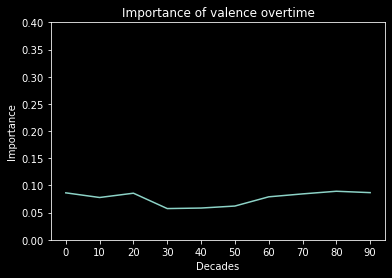

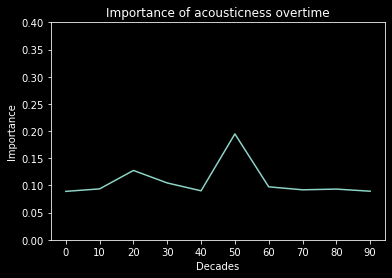

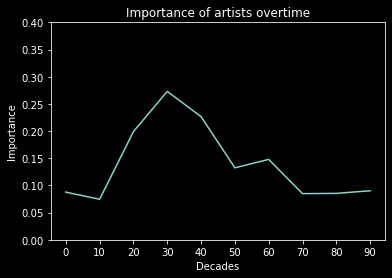

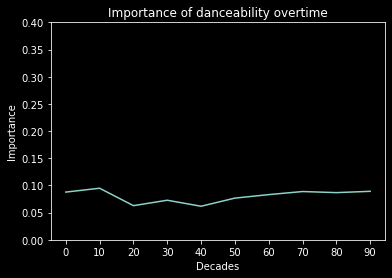

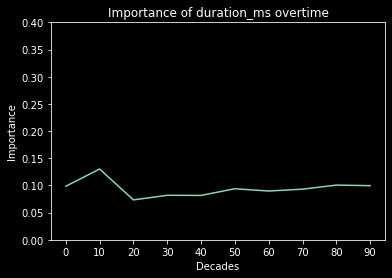

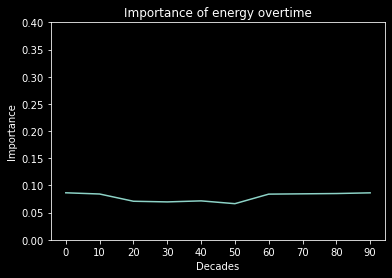

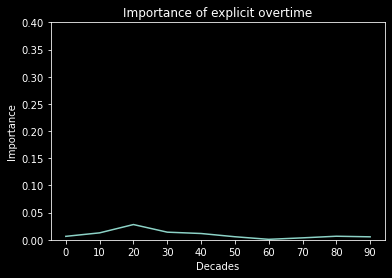

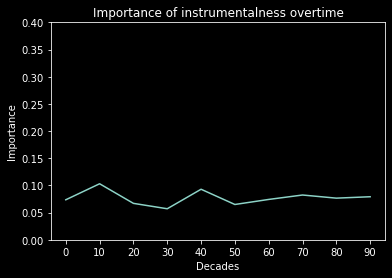

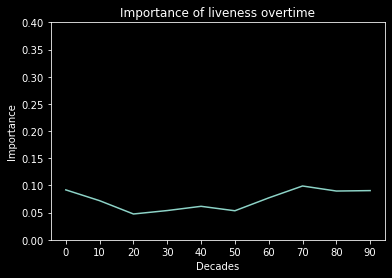

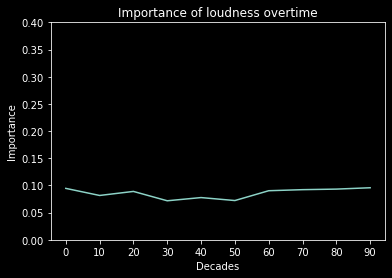

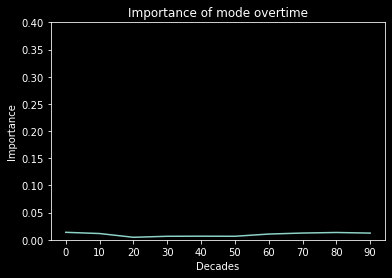

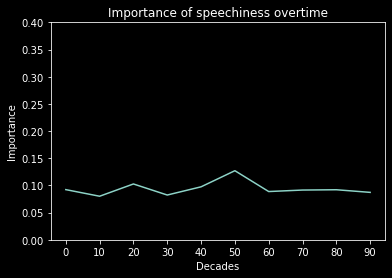

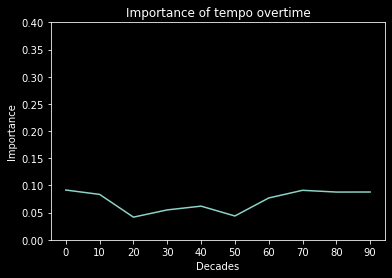

In [7]:
from matplotlib import style
style.use('dark_background')

for feature in features:
    plt.figure()
    plt.title(f"Importance of {feature} overtime")
    plt.xlabel("Decades")
    plt.ylabel("Importance")
    plt.ylim(top=0.4, bottom=0.0)
    plt.plot(decades, feature_imps[feature])